In [1]:
import uproot
import ROOT as r
import awkward as ak
import hist
from hist import Hist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mpl_plot_utilities as mplutils


Welcome to JupyROOT 6.28/06


In [19]:
lumi = 10.7*.1 #pb-1
mc_scale = {'tritrig' : 1.416e9*lumi/(50000*9853),
            'wab' : 0.1985e12*lumi/(100000*9966)}

#No smearing, old files
tt_ns_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/no_smearing/final_hadd_tritrigv2-beamv6_2500kBunches_HPS-PhysicsRun2016-Pass2_v4_5_0_pairs1_KF_ana.root'
wab_ns_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/no_smearing/final_hadd_wabv3-beamv6_2500kBunches_HPS-PhysicsRun2016-Pass2_v4_5_0_pairs1_KF_ana.root'
data_ns_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/no_smearing/hadd_hps_BLPass4_1958_files_recon_4.2_ana_kf.root'
sel_ns = 'vtxana_kf_vtxSelection'

#check selection
#data_ns_psum_h, tt_ns_psum_h, wab_ns_psum_h = None, None, None
with uproot.open(data_ns_f) as file:
    data_ns_sel_h = file[f'{sel_ns}/{sel_ns}_cutflow']
    data_ns_psum_h = file[f'{sel_ns}/{sel_ns}_vtx_Psum_h'].to_hist()
    data_ns_psum_h = data_ns_psum_h/data_ns_psum_h[::sum].value
with uproot.open(tt_ns_f) as file:
    tt_ns_sel_h = file[f'{sel_ns}/{sel_ns}_cutflow']
    tt_ns_psum_h = file[f'{sel_ns}/{sel_ns}_vtx_Psum_h'].to_hist()*mc_scale['tritrig']
    #tt_ns_psum_h = tt_ns_psum_h/tt_ns_psum_h[::sum].value
with uproot.open(wab_ns_f) as file:
    wab_ns_sel_h = file[f'{sel_ns}/{sel_ns}_cutflow']
    wab_ns_psum_h = file[f'{sel_ns}/{sel_ns}_vtx_Psum_h'].to_hist()*mc_scale['wab']
    #wab_ns_psum_h = (wab_ns_psum_h/wab_ns_psum_h[::sum].value 
    #print(wab_ns_psum_h[::sum].value)

/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


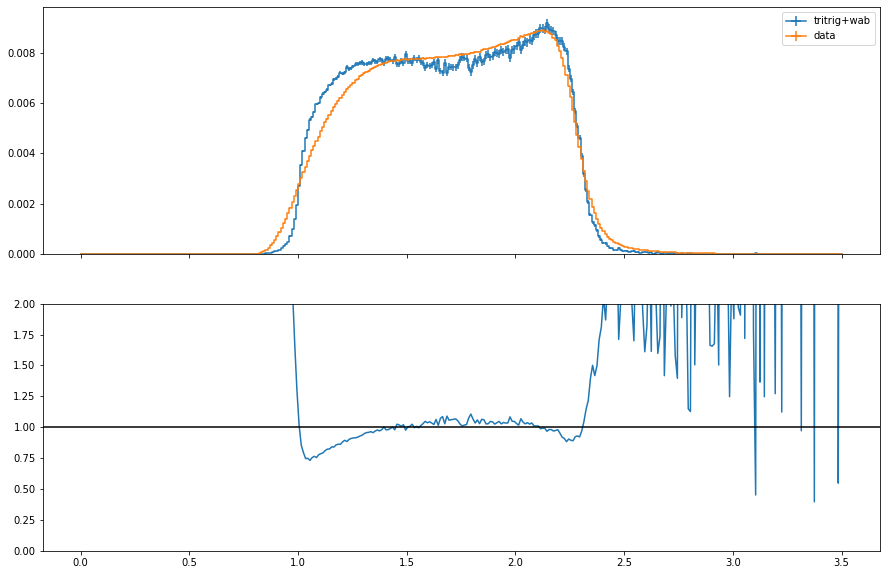

In [20]:
#sum tritrig + wab
plt.close('all')
tt_wab_ns_psum_h = tt_ns_psum_h + wab_ns_psum_h
tt_wab_ns_psum_h = tt_wab_ns_psum_h/tt_wab_ns_psum_h[::sum].value
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,10))
#tt_ns_psum_h.plot(ax=ax[0], label='tritrig')
#wab_ns_psum_h.plot(ax=ax[0],label='wab')
tt_wab_ns_psum_h.plot(ax=ax[0],label='tritrig+wab')
data_ns_psum_h.plot(ax=ax[0], label='data')
ax[0].legend()
ax[1].plot(tt_wab_ns_psum_h.axes[0].centers, data_ns_psum_h.values() / tt_wab_ns_psum_h.values(), label='Ratio')
ax[1].set_ylim(0,2)
ax[1].axhline(1.0,color='black')
#data_ns_psum_h.plot_ratio(tt_wab_ns_psum_h, ax=ax[1], label='triitrig+wab+beam : data')
#data_ns_psum_h.plot_ratio(tt_wab_ns_psum_h)
#ax[1].legend()

/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


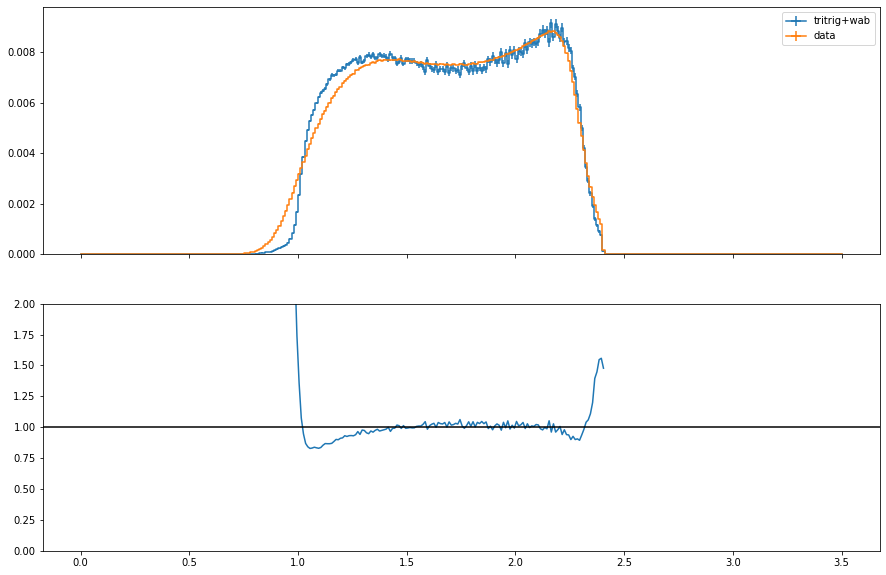

In [22]:
#First attempt to scale MC using ECal gains
mc_scale = {'tritrig' : 1.416e9*lumi/(50000*10000),
            'wab' : 0.1985e12*lumi/(100000*10000)}
sel = 'vtxana_vtxSelection'
tt_s1_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/smearing_20231129/final_hadd_ecalSmearingUpdate_tritrig_beam_ana.root'
wab_s1_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/smearing_20231129/final_hadd_ecalSmearingUpdate_wab_beam_ana.root'
data_f = '/sdf/group/hps/users/alspellm/projects/THESIS/data/2016/BLPass4c_20231006/ana_20231019/full_hadd_blpass4c_ana.root'

with uproot.open(data_f) as file:
    data_sel_h = file[f'{sel}/{sel}_cutflow']
    data_psum_h = file[f'{sel}/{sel}_vtx_Psum_h'].to_hist()
    data_psum_h = data_psum_h/data_psum_h[::sum].value
with uproot.open(tt_s1_f) as file:
    tt_s1_psum_h = file[f'{sel}/{sel}_vtx_Psum_h'].to_hist()*mc_scale['tritrig']
with uproot.open(wab_s1_f) as file:
    wab_s1_psum_h = file[f'{sel}/{sel}_vtx_Psum_h'].to_hist()*mc_scale['wab']
    
#sum tritrig + wab
tt_wab_s1_psum_h = tt_s1_psum_h + wab_s1_psum_h
tt_wab_s1_psum_h = tt_wab_s1_psum_h/tt_wab_s1_psum_h[::sum].value
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,10))
#tt_s1_psum_h.plot(ax=ax[0], label='tritrig')
#wab_s1_psum_h.plot(ax=ax[0],label='wab')
tt_wab_s1_psum_h.plot(ax=ax[0],label='tritrig+wab')
data_psum_h.plot(ax=ax[0], label='data')
ax[0].legend()
ax[1].plot(tt_wab_s1_psum_h.axes[0].centers, data_psum_h.values() / tt_wab_s1_psum_h.values(), label='Ratio')
ax[1].set_ylim(0,2)
ax[1].axhline(1.0,color='black')

/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


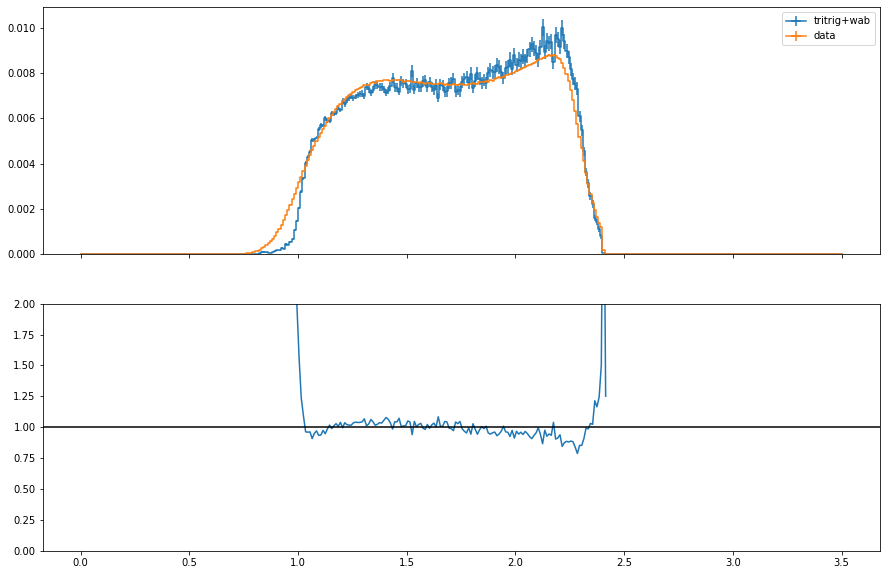

In [24]:
tt_s2_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/new_smearing/hadd_tritrig_beam_10k_files.root'
wab_s2_f = '/sdf/group/hps/users/alspellm/projects/THESIS/analysis/data_mc_comparisons/update_20230112/new_smearing/hadd_wab_beam_10k_files.root'

with uproot.open(tt_s2_f) as file:
    tt_s2_sel_h = file[f'{sel}/{sel}_cutflow']
    tt_s2_psum_h = file[f'{sel}/{sel}_vtx_Psum_h'].to_hist()*mc_scale['tritrig']
with uproot.open(wab_s2_f) as file:
    wab_s2_psum_h = file[f'{sel}/{sel}_vtx_Psum_h'].to_hist()*mc_scale['wab']

#sum tritrig + wab
tt_wab_s2_psum_h = tt_s2_psum_h + wab_s2_psum_h
tt_wab_s2_psum_h = tt_wab_s2_psum_h/tt_wab_s2_psum_h[::sum].value
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,10))
tt_wab_s2_psum_h.plot(ax=ax[0],label='tritrig+wab')
data_psum_h.plot(ax=ax[0], label='data')
ax[0].legend()
ax[1].plot(tt_wab_s2_psum_h.axes[0].centers, data_psum_h.values() / tt_wab_s2_psum_h.values(), label='Ratio')
ax[1].set_ylim(0,2)
ax[1].axhline(1.0,color='black')

/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/sdf/home/a/alspellm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


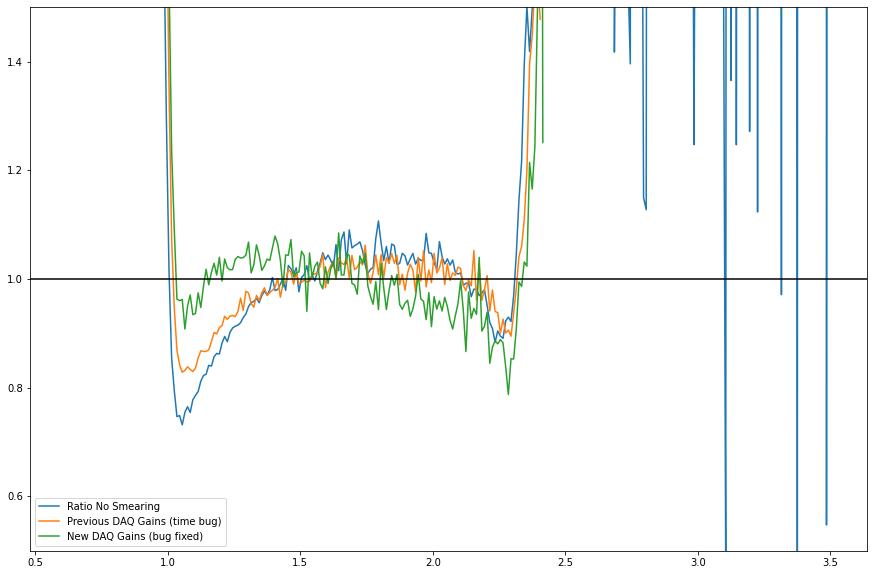

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(tt_wab_ns_psum_h.axes[0].centers, data_ns_psum_h.values() / tt_wab_ns_psum_h.values(), label='Ratio No Smearing') 
ax.plot(tt_wab_s1_psum_h.axes[0].centers, data_psum_h.values() / tt_wab_s1_psum_h.values(), label='Previous DAQ Gains (time bug)')
ax.plot(tt_wab_s2_psum_h.axes[0].centers, data_psum_h.values() / tt_wab_s2_psum_h.values(), label='New DAQ Gains (bug fixed)')
ax.set_ylim(0.5,1.5)
ax.axhline(1.0,color='black')
ax.legend()
                       

In [31]:
print(tt_s2_sel_h.axes[0].labels())
print('\n')
print(data_sel_h.axes[0].labels())

['no-cuts', 'Trigger Pair1', '#chi^{2}_{unc}<20', 'p e^{-}<1.75GeV', 'eleN2Dhits > 7', 'e^{-} Track #chi^{2}/Ndf<20', 'e^{-} #Delta_{t}(trk,clu)<4ns', 'e^{-} trkTime<6ns', '#Delta_{t}(clu_{e^{-}},clu_{e^{+}})<1.45ns', 'maxVtxMom<2.4 [GeV]', 'posN2Dhits > 7', 'e^{+} Track #chi^{2}/Ndf<20', 'e^{+} #Delta_{t}(trk,clu)<4ns', 'e^{+} trkTime<6ns']


['no-cuts', 'Trigger Pair1', '#chi^{2}_{unc}<20', 'p e^{-}<1.75GeV', 'eleN2Dhits > 7', 'e^{-} Track #chi^{2}/Ndf<20', 'e^{-} #Delta_{t}(trk,clu)<4ns', 'e^{-} trkTime<6ns', '#Delta_{t}(clu_{e^{-}},clu_{e^{+}})<1.45ns', 'maxVtxMom<2.4 [GeV]', 'posN2Dhits > 7', 'e^{+} Track #chi^{2}/Ndf<20', 'e^{+} #Delta_{t}(trk,clu)<4ns', 'e^{+} trkTime<6ns']


In [ ]:
'''
#sum tritrig + wab
plt.close('all')
tt_wab_ns_psum_h = tt_ns_psum_h + wab_ns_psum_h
#fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,10))
#tt_ns_psum_h.plot(ax=ax[0], label='tritrig')
#wab_ns_psum_h.plot(ax=ax[0],label='wab')
#tt_wab_ns_psum_h.plot(ax=ax[0],label='tritrig+wab')
#data_ns_psum_h.plot(ax=ax[0], label='data')
#ax[0].legend()
#data_ns_psum_h.plot_ratio(tt_wab_ns_psum_h, ax=ax[1], label='triitrig+wab+beam : data')
#fig, ax = plt.subplots(figsize=(15,10))
fig = plt.figure(figsize=(15,10))
main, sub = data_ns_psum_h.plot_ratio(tt_wab_ns_psum_h)
fig.axes[1].set_ylim(0,2.5)
#ax[1].legend()
'''

In [ ]:
#print("Data:" ,data_ns_sel_h.axes[0].labels())
#print("\nTT:" ,tt_ns_sel_h.axes[0].labels())
#print("\nWab:" ,wab_ns_sel_h.axes[0].labels())
